In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/inventory_data.csv')

In [4]:
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,0ddc2379-adba-4fb0-aa97-19fcafc738a1,0.35,3.0,-0.02885
3,2022-03-01 09:00:00,146d5e4d-992a-4db7-904d-b8af359b80a7,0.48,1.0,-0.02885
4,2022-03-01 09:00:00,14736243-d346-438f-9535-d80fcb9f3882,0.67,6.0,-0.02885


In [5]:
df.tail()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
10840,2022-03-07 19:00:00,e68b76ae-951d-4d82-8168-e78d46711883,0.20,NaN,-0.165077
10841,2022-03-07 19:00:00,ec0bb9b5-45e3-4de8-963d-e92aa91a201e,0.34,NaN,-0.165077
10842,2022-03-07 19:00:00,ec4aa84b-bcb9-4b6a-b5ef-1ab2462e15a0,0.93,NaN,-0.165077
10843,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077
10844,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077


In [6]:
df.sample(5)

,timestamp,product_id,estimated_stock_pct,quantity,temperature
8960,2022-03-05 15:00:00,1836aed0-2d07-4ff2-92e1-c14b182df094,0.47,NaN,0.040165
620,2022-03-02 13:00:00,459e1043-9c56-4c44-8aab-0f384fed51af,0.43,2.0,-0.332065
3782,2022-03-05 10:00:00,19b5273d-0e12-4e92-aa60-4b9643fd33a8,0.91,3.0,-0.657082
7224,2022-03-03 11:00:00,3cf08828-7cff-47f4-8bfb-1c7aa3b2b407,0.48,NaN,-0.694656
55,2022-03-01 10:00:00,2c50b273-ed34-4917-a78b-67e98dc6b7b2,0.30,4.0,1.284310


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            10845 non-null  object 
 1   product_id           10845 non-null  object 
 2   estimated_stock_pct  10845 non-null  float64
 3   quantity             3067 non-null   float64
 4   temperature          10845 non-null  float64
dtypes: float64(3), object(2)
memory usage: 423.8+ KB


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df['timestamp'].min(), df['timestamp'].max()

(Timestamp('2022-03-01 09:00:00'), Timestamp('2022-03-07 19:00:00'))

In [9]:
df.isnull().sum()

,0
timestamp,0
product_id,0
estimated_stock_pct,0
quantity,7778
temperature,0


In [ ]:
df.describe()

,timestamp,estimated_stock_pct,quantity,temperature
count,10845,10845.000000,3067.000000,10845.000000
mean,2022-03-04 14:15:38.091286272,0.505130,3.212586,-0.213678
min,2022-03-01 09:00:00,0.010000,1.000000,-1.847270
25%,2022-03-02 17:00:00,0.300000,2.000000,-0.657082
50%,2022-03-04 14:00:00,0.500000,3.000000,-0.230631
75%,2022-03-06 11:00:00,0.715000,4.000000,0.160429
max,2022-03-07 19:00:00,1.000000,15.000000,1.435940
std,NaN,0.264519,1.974511,0.649671


## Fbprophet

In [11]:
from prophet import Prophet

In [12]:
df1 = df.drop(['product_id','quantity','temperature'], axis=1)

In [13]:
df1 = df1.rename(columns={'estimated_stock_pct': 'y', 'timestamp': 'ds'})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10845 non-null  datetime64[ns]
 1   y       10845 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.6 KB


In [14]:
m = Prophet()
m.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjff_tchi/8f0xd62r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjff_tchi/vwnh9ij1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69343', 'data', 'file=/tmp/tmpjff_tchi/8f0xd62r.json', 'init=/tmp/tmpjff_tchi/vwnh9ij1.json', 'output', 'file=/tmp/tmpjff_tchi/prophet_modelfi9ph9cg/prophet_model-20240819143235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
# Create future dates for forecasting
future = m.make_future_dataframe(periods=200, freq='H')
future.tail()

,ds
272,2022-03-15 23:00:00
273,2022-03-16 00:00:00
274,2022-03-16 01:00:00
275,2022-03-16 02:00:00
276,2022-03-16 03:00:00


In [17]:
forecast = m.predict(future)

In [18]:
# Integrate historical data with forecast
forecast_full = forecast.set_index('ds').join(df1.set_index('ds'), how='left', rsuffix='_actual')
forecast_full.reset_index(inplace=True)

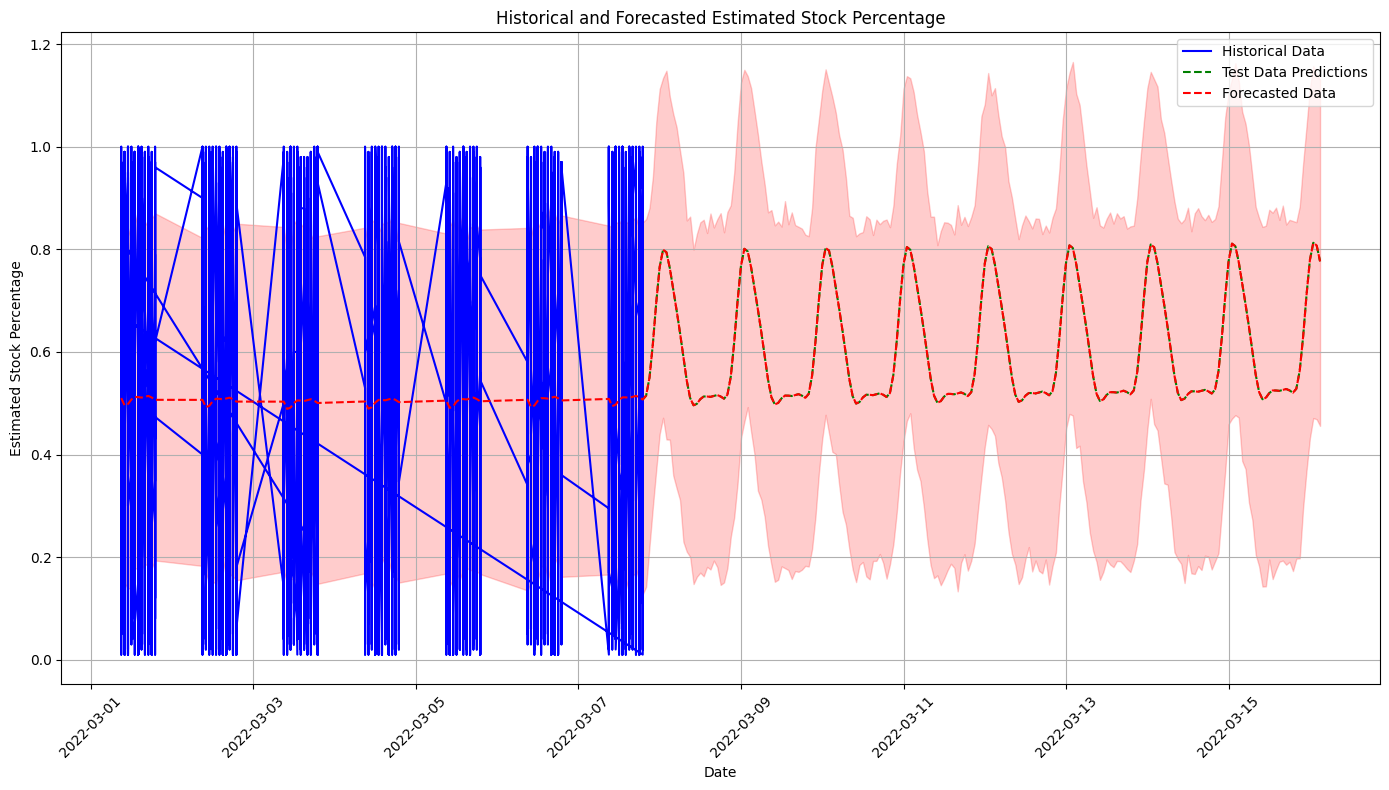

In [24]:
import matplotlib.pyplot as plt

# Plot the combined data
fig, ax = plt.subplots(figsize=(14, 8))

# Plot historical values
ax.plot(df1['ds'], df1['y'], label='Historical Data', color='blue')

# Plot predicted values on test data
test_start = df1['ds'].max()  # Start of test data
test_end = forecast_full['ds'].max()  # End of forecast data
mask_test = (forecast_full['ds'] >= test_start) & (forecast_full['ds'] <= test_end)
ax.plot(forecast_full[mask_test]['ds'], forecast_full[mask_test]['yhat'], label='Test Data Predictions', linestyle='--', color='green')

# Plot forecasted values
ax.plot(forecast_full['ds'], forecast_full['yhat'], label='Forecasted Data', linestyle='--', color='red')

# Plot the forecast uncertainty intervals
ax.fill_between(forecast_full['ds'], forecast_full['yhat_lower'], forecast_full['yhat_upper'], color='red', alpha=0.2)

# Formatting the plot
plt.title('Historical and Forecasted Estimated Stock Percentage')
plt.xlabel('Date')
plt.ylabel('Estimated Stock Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

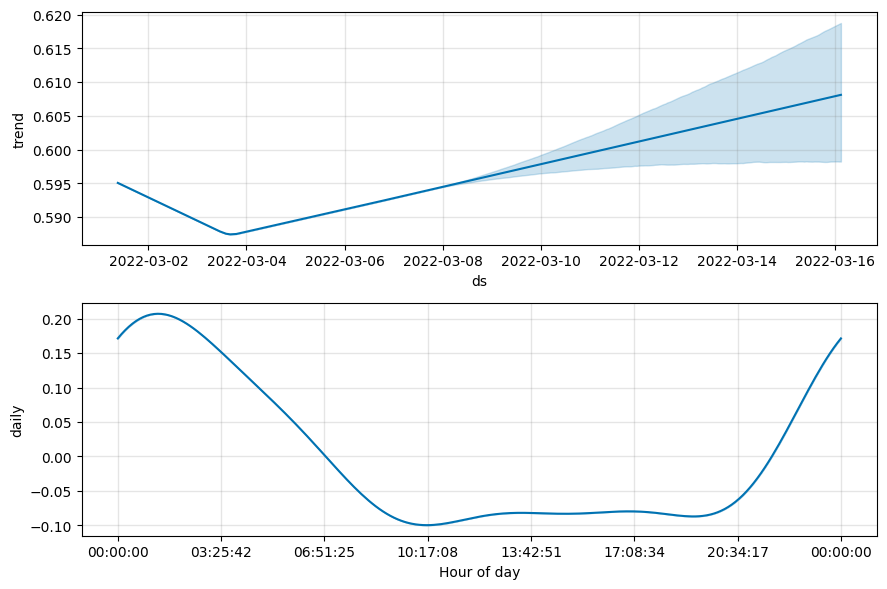

In [22]:
fig = m.plot_components(forecast_full)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_full)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
plot_components_plotly(m, forecast_full)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [25]:
import pickle

# Save the trained model as a .pkl file
with open('trained_prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

print("Model saved as trained_prophet_model.pkl")

Model saved as trained_prophet_model.pkl
